## Observations and Insights

## Dependencies and starter code

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_tumor_data = combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
mean_tumor_volume = grouped_tumor_data.mean()
median_tumor_volume = grouped_tumor_data.median()
variance_tumor_volume = grouped_tumor_data.var()
std_deviation_tumor_volume = grouped_tumor_data.std()
std_error_tumor_volume = grouped_tumor_data.sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                  "Median Tumor Volume": median_tumor_volume,
                                  "Tumor Volume Variance": variance_tumor_volume,
                                  "Tumor Volume Std. Dev.": std_deviation_tumor_volume,
                                  "Tumor Volume Std. Error": std_error_tumor_volume})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

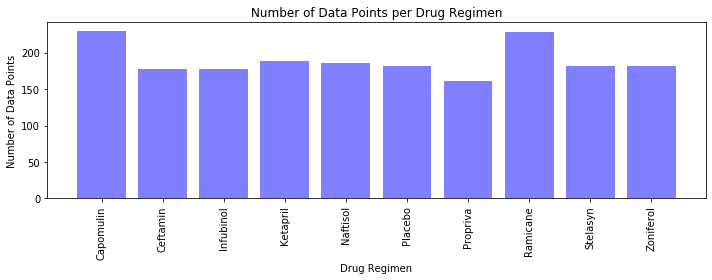

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(bar_chart_data))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,4))
plt.bar(x_axis, bar_chart_data, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, bar_chart_data.keys(), rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points per Drug Regimen")
plt.tight_layout()

## Pie plots

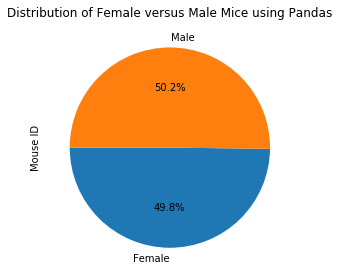

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grouped_gender_data = combined_data.groupby(["Sex"])
gender_count = grouped_gender_data.nunique()["Mouse ID"]
gender_count.plot.pie(y="Sex", autopct="%1.1f%%", legend=None, startangle=180)
plt.title("Distribution of Female versus Male Mice using Pandas")
plt.tight_layout()
plt.show()

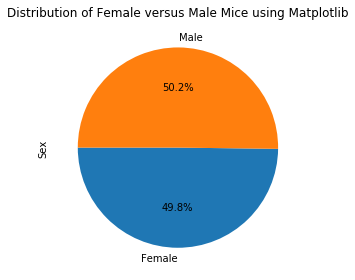

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_labels = ["Female", "Male"]
plt.pie(gender_count, labels=gender_labels, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.title("Distribution of Female versus Male Mice using Matplotlib")
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Determine the maximum Timepoint for each Mouse and then re-combine entire data set by Mouse ID and Timepoint

grouped_mouse_data = combined_data.groupby("Mouse ID").max()["Timepoint"]
final_volume = pd.DataFrame(grouped_mouse_data)
recombined_data = pd.merge(final_volume, combined_data, how="left", on=("Mouse ID", "Timepoint"))

# Capomulin Drug Treatment

capomulin_treatment = recombined_data.loc[ (recombined_data["Drug Regimen"] == "Capomulin") ,:]
capomulin_quartiles = capomulin_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin: {capomulin_iqr}")
print(f"The median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Capomulin values below {capomulin_lower_bound} could be outliers.")
print(f"Capomulin values above {capomulin_upper_bound} could be outliers.")
print()


# Ramicane Drug Treatment

ramicane_treatment = recombined_data.loc[ (recombined_data["Drug Regimen"] == "Ramicane") ,:]
ramicane_quartiles = ramicane_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane: {ramicane_iqr}")
print(f"The median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Ramicane values below {ramicane_lower_bound} could be outliers.")
print(f"Ramicane values above {ramicane_upper_bound} could be outliers.")
print()


# Infubinol Drug Treatment

infubinol_treatment = recombined_data.loc[ (recombined_data["Drug Regimen"] == "Infubinol") ,:]
infubinol_quartiles = infubinol_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol: {infubinol_iqr}")
print(f"The median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Infubinol values below {infubinol_lower_bound} could be outliers.")
print(f"Infubinol values above {infubinol_upper_bound} could be outliers.")
print()


# Ceftamin Drug Treatment

ceftamin_treatment = recombined_data.loc[ (recombined_data["Drug Regimen"] == "Ceftamin") ,:]
ceftamin_quartiles = ceftamin_treatment["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin: {ceftamin_iqr}")
print(f"The median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Ceftamin values below {ceftamin_lower_bound} could be outliers.")
print(f"Ceftamin values above {ceftamin_upper_bound} could be outliers.")
print()

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Capomulin values below 20.70456164999999 could be outliers.
Capomulin values above 51.83201549 could be outliers.

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane: 9.098536719999998
The median of Ramicane is: 36.56165229 
Ramicane values below 17.912664470000003 could be outliers.
Ramicane values above 54.30681135 could be outliers.

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol: 11.477135160000003
The median of Infubinol is: 60.16518046 
Infubinol values below 36.83290494999999 could be outliers.
Infubinol values above 82.74144559000001 could be outliers.

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of

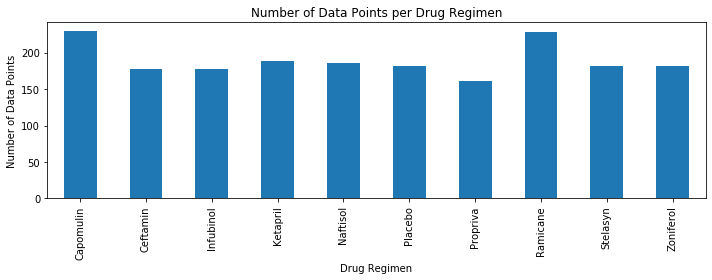

In [24]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

bar_chart_data = grouped_tumor_data.count()
bar_chart_data.plot(kind="bar", figsize=(10, 4))
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points per Drug Regimen")
plt.tight_layout()
plt.show()

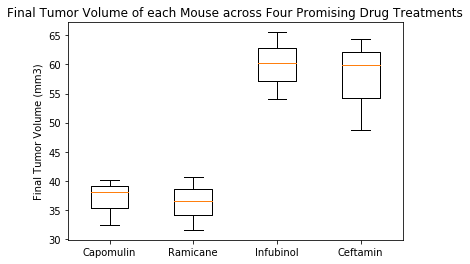

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

four_treatments = [capomulin_quartiles, ramicane_quartiles, infubinol_quartiles, ceftamin_quartiles]
xaxis_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each Mouse across Four Promising Drug Treatments")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(four_treatments, labels=xaxis_labels)
#ax1.boxplot(four_treatments, showfliers=True, flierprops=dict(markerfacecolor='r', marker='o'))
plt.show()

## Line and scatter plots

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

regrouped_mouse_data = combined_data.groupby(["Mouse ID"])["Timepoint"]
regrouped_mouse_data.head()


0        0
1        0
2        0
3        0
4        0
        ..
1107    20
1108    20
1109    20
1110    20
1112    20
Name: Timepoint, Length: 1108, dtype: int64

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [38]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen